In [18]:
import json
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

fname = '../data/theses_dump_06-04-2017'

def jl_to_df(fname):
    with open(fname) as f:
        return pd.DataFrame([json.loads(line) for line in f])

In [19]:
df = jl_to_df(fname)

In [14]:
df

,_id,abstracts_en,abstracts_fi,abstracts_sv,authors,collections,dates,degree,document_urls,keywords,...,orientations,programmes,subjects,titles,topics,university,updatedat,urls,year,years
0,oai:www.theseus.fi:10024/474,[The aim of this thesis is to chart the intern...,[Opinnäytetyössä kartoitettiin verkkovideoiden...,[],"[Hakala, Lilli]","[com_10024_14, col_10024_174]",[2013-08-19T10:18:05Z],{u'_id': u'col_10024_174'},[http://www.theseus.fi/bitstream/10024/474/1/H...,[],...,[],[Viestinnän koulutusohjelma],"[verkkojulkaiseminen, verkkoviestintä, verkkoj...",[Hyvä ja toimiva video sanomalehden verkkopalv...,"[video, verkkoviestintä, verkkojulkaisut, verk...",{u'_id': u'com_10024_14'},{u'$date': u'2017-04-06T10:35:45.845Z'},[http://www.theseus.fi/handle/10024/474],2008.0,[2008]
1,oai:www.theseus.fi:10024/592,[Video surveillance is evolving from analog sy...,[Kameravalvontatekniikka on muutoksessa: analo...,[],"[Halkosaari, Antti]","[com_10024_12, col_10024_270]",[2013-05-06T15:30:26Z],{u'_id': u'col_10024_270'},[http://www.theseus.fi/bitstream/10024/592/1/O...,[],...,[],[Turvallisuusalan koulutusohjelma],"[valvonta, yritykset, turvallisuus, toimitilat...",[Kameravalvonta muutoksessa],"[tietoverkot, yritykset, kamerat, valvonta, ka...",{u'_id': u'com_10024_12'},{u'$date': u'2017-04-06T10:35:45.854Z'},[http://www.theseus.fi/handle/10024/592],2007.0,[2007]
2,oai:www.theseus.fi:10024/492,[The aim of the master´s thesis was to study i...,[Opinnäytetyön tarkoituksena oli selvittää tie...,[],"[Aaltonen, Päivi, Katajisto, Helena]","[com_10024_14, col_10024_153]",[2013-08-19T09:20:19Z],{u'_id': u'col_10024_153'},[http://www.theseus.fi/bitstream/10024/492/1/2...,[],...,[Hoitotyön suuntautumisvaihtoehto],[Hoitotyön koulutusohjelma],"[hoitotyö, kirjaaminen, jatkuvuus, raportointi]",[Hoitotyöntekijöiden kokemuksia raportointikäy...,"[hoitotyö, kirjaaminen, raportointi, jatkuvuus]",{u'_id': u'com_10024_14'},{u'$date': u'2017-04-06T10:35:45.859Z'},[http://www.theseus.fi/handle/10024/492],2008.0,[2008]
3,oai:www.theseus.fi:10024/491,[The aim of this study was to find out what ki...,[Opinnäytetyön tavoitteena oli saada tietoa ty...,[],"[Silander, Merja]","[com_10024_14, col_10024_159]",[2013-08-19T09:37:29Z],{u'_id': u'col_10024_159'},[http://www.theseus.fi/bitstream/10024/491/1/2...,[],...,[],[Kuntoutusohjauksen ja suunnittelun koulutusoh...,"[MS-tauti, työterveyshuolto, työkyky]",[MS-tautia sairastavien kokemuksia työterveysh...,"[ms-tauti, työterveyshuolto, työkyky]",{u'_id': u'com_10024_14'},{u'$date': u'2017-04-06T10:35:45.863Z'},[http://www.theseus.fi/handle/10024/491],2008.0,[2008]
4,oai:www.theseus.fi:10024/493,[The aim of the present bachelor´s thesis was ...,[Tämän opinnäytetyön aiheena oli kehittää aute...,[],"[Levola, Johanna]","[com_10024_14, col_10024_169]",[2013-08-19T10:03:28Z],{u'_id': u'col_10024_169'},[http://www.theseus.fi/bitstream/10024/493/1/2...,[],...,[Erityisryhmien sosiaalipalvelujen suuntautumi...,[Sosiaalialan koulutusohjelma],"[kehitysvammaiset, asuminen, asumispalvelut, p...",[Tilapäisasumisen kehittäminen asuntola Apollo...,"[asumispalvelut, perehdytys, kehitysvammaiset,...",{u'_id': u'com_10024_14'},{u'$date': u'2017-04-06T10:35:45.868Z'},[http://www.theseus.fi/handle/10024/493],2008.0,[2008]
5,oai:www.theseus.fi:10024/494,[Intention of this thesis work was to create a...,[Tämän opinnäytetyön tarkoituksena oli tuottaa...,[],"[Korpela, Kati]","[com_10024_14, col_10024_153]",[2013-08-19T09:20:21Z],{u'_id': u'col_10024_153'},[http://www.theseus.fi/bitstream/10024/494/1/2...,[],...,[Hoitotyön suuntautumisvaihtoehto],[Hoitotyön koulutusohjelma],"[nielemishäiriöt, nieleminen, ikääntyminen, au...",[Opas hoitajille nielemisvaikeuksien tunnistam...,"[ohjeet, nielemishäiriöt, auttaminen, ravitsem...",{u'_id': u'com_10024_14'},{u'$date': u'2017-04-06T10:35:45.873Z'},[http://www.theseus.fi/handle/10024/494],2008.0,[2008]
6,oai:www.theseus.fi:10024/495,[The purpose of this study was to survey fathe...,[Tämän opinnäytetyön aihe

## Perform NMF

In [9]:
from __future__ import print_function
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

n_samples = 100000
n_features = 1000
n_topics = 50
n_top_words = 10

# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

t0 = time()
print("Loading dataset and extracting TF-IDF features...")
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=n_features,
                             stop_words='english')
tfidf = vectorizer.fit_transform(df["abstract_fi"].apply(lambda x: x[0] if len(x) > 0 else '')[:n_samples])
print("done in %0.3fs." % (time() - t0))

# Fit the NMF model
print("Fitting the NMF model with n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
nmf = NMF(n_components=n_topics, random_state=1).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

feature_names = vectorizer.get_feature_names()

for topic_idx, topic in enumerate(nmf.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

Loading dataset and extracting TF-IDF features...
done in 27.620s.
Fitting the NMF model with n_samples=100000 and n_features=1000...
done in 238.417s.
Topic #0:
ja niiden tavoitteena kautta kuten suunnittelu siihen uusia niihin erityisesti

Topic #1:
olivat aineisto koettiin kokemuksia kerättiin tietoa kokivat analysoitiin tulosten osa

Topic #2:
oli tavoitteena tarkoituksena olivat selvittää saada tutkia kaksi suunnitella joka

Topic #3:
opinnäytetyön tämän tarkoituksena tavoitteena aiheena lisäksi teoriaosuudessa toimeksiantajan toiminnallisen tuloksena

Topic #4:
yrityksen yritys yritykselle case yrityksessä liiketoiminnan henkilöstön luoda tuotteiden pohjalta

Topic #5:
kanssa yhteistyössä yhdessä yhteistyötä yhteistyön yhteistyö toteutettiin asiakkaan henkilökunnan työntekijöiden

Topic #6:
sekä lisäksi muun muassa niiden liittyviä tavoitteena koostuu osalta alan

Topic #7:
nuorten nuoret nuoren nuorille ja koulun heidän terveyden tietoa tukea

Topic #8:
tulee tulisi jotta olla h

(array([ 266.,  186.,  103.,   88.,   60.,   49.,   29.,   39.,   35.,
          24.,   17.,   20.,   22.,   14.,    7.,   12.,   11.,    6.,
          10.,    5.,    8.,    7.,    8.,    5.,    5.,    3.,    5.,
           2.,    3.,    3.]),
 array([ 0.1 ,  0.13,  0.16,  0.19,  0.22,  0.25,  0.28,  0.31,  0.34,
         0.37,  0.4 ,  0.43,  0.46,  0.49,  0.52,  0.55,  0.58,  0.61,
         0.64,  0.67,  0.7 ,  0.73,  0.76,  0.79,  0.82,  0.85,  0.88,
         0.91,  0.94,  0.97,  1.  ]),
 <a list of 30 Patch objects>)

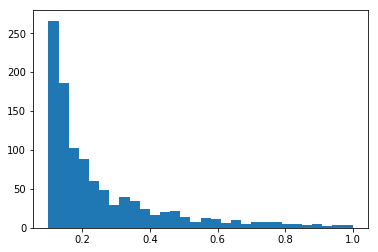

In [28]:
plt.hist(nmf.components_.max(axis=0), bins=30, range=(0.1, 1))

In [37]:
c = df["degrees"].apply(lambda x: x[0] if len(x)>0 else '').value_counts()
c

Liiketalouden koulutusohjelma                                                      8895
Hoitotyön koulutusohjelma                                                          7391
Sosiaalialan koulutusohjelma                                                       4897
Liiketalous                                                                        3224
Hoitotyö                                                                           2700
Tietojenkäsittelyn koulutusohjelma                                                 2230
Liiketalouden tutkinto-ohjelma                                                     2054
Tietotekniikan koulutusohjelma                                                     2039
Rakennustekniikan koulutusohjelma                                                  1962
Kone- ja tuotantotekniikan koulutusohjelma                                         1903
Degree Programme in International Business                                         1838
Matkailun koulutusohjelma       

In [40]:
c[c > 100].shape

(216,)

## Hierarchical clustering

In [20]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics import pairwise_distances
import numpy as np

In [23]:
df["degree"] = df["degree"].apply(lambda x: x["_id"])
df["university"] = df["university"].apply(lambda x: x["_id"])
df["collection"] = df["collections"].apply(lambda x: filter(lambda x: "col" in x, x)).apply(lambda x: x[0] if len(x)>0 else "")
df["community"] = df["collections"].apply(lambda x: filter(lambda x: "com" in x, x)).apply(lambda x: x[0] if len(x)>0 else "")
# BUG: collection col_10024_79818 has two degrees associated Sosiaalialan tutkinto-ohjelma, perheiden hyvin..., Terveyden edistämisen tutkinto-ohjelma (Ylempi...

TypeError: string indices must be integers

In [6]:
# Create mapping between codes and names, because we can only aggregate lits by one column, so we use collection
# and we join after to add the degree and university
collection_degree_map = pd.DataFrame(df.groupby(["collection", "degree"]).groups.keys(), columns=["collection", "degree"])
collection_university_map = pd.DataFrame(df.groupby(["collection", "university"]).groups.keys(), columns=["collection", "university"])

In [7]:
temp = pd.DataFrame(df.groupby(["collection"])["topics"].sum(), columns=["topics"]).reset_index()
temp['topics'] = temp['topics'].apply(lambda topics: " ".join(topics))
temp['n_topics'] = temp['topics'].apply(len)
temp['n_theses'] = df.groupby(["collection"]).size().values
topics = temp[temp['n_topics'] > 1000]
topics = topics.merge(collection_degree_map).merge(collection_university_map)
top = topics['topics']
# Unfortunately Pandas does not allow to reduce list properly https://github.com/pandas-dev/pandas/issues/4293
# TODO: use custom vocabulary not to split multi word topics
# Could also use DictVectorizer to dictionary with counts

In [8]:
tfidf = TfidfVectorizer(min_df=3, max_df=0.95)

In [9]:
m = tfidf.fit_transform(top.values)

In [10]:
m.shape

(821, 27336)

In [11]:
d = pairwise_distances(m, metric='cosine')

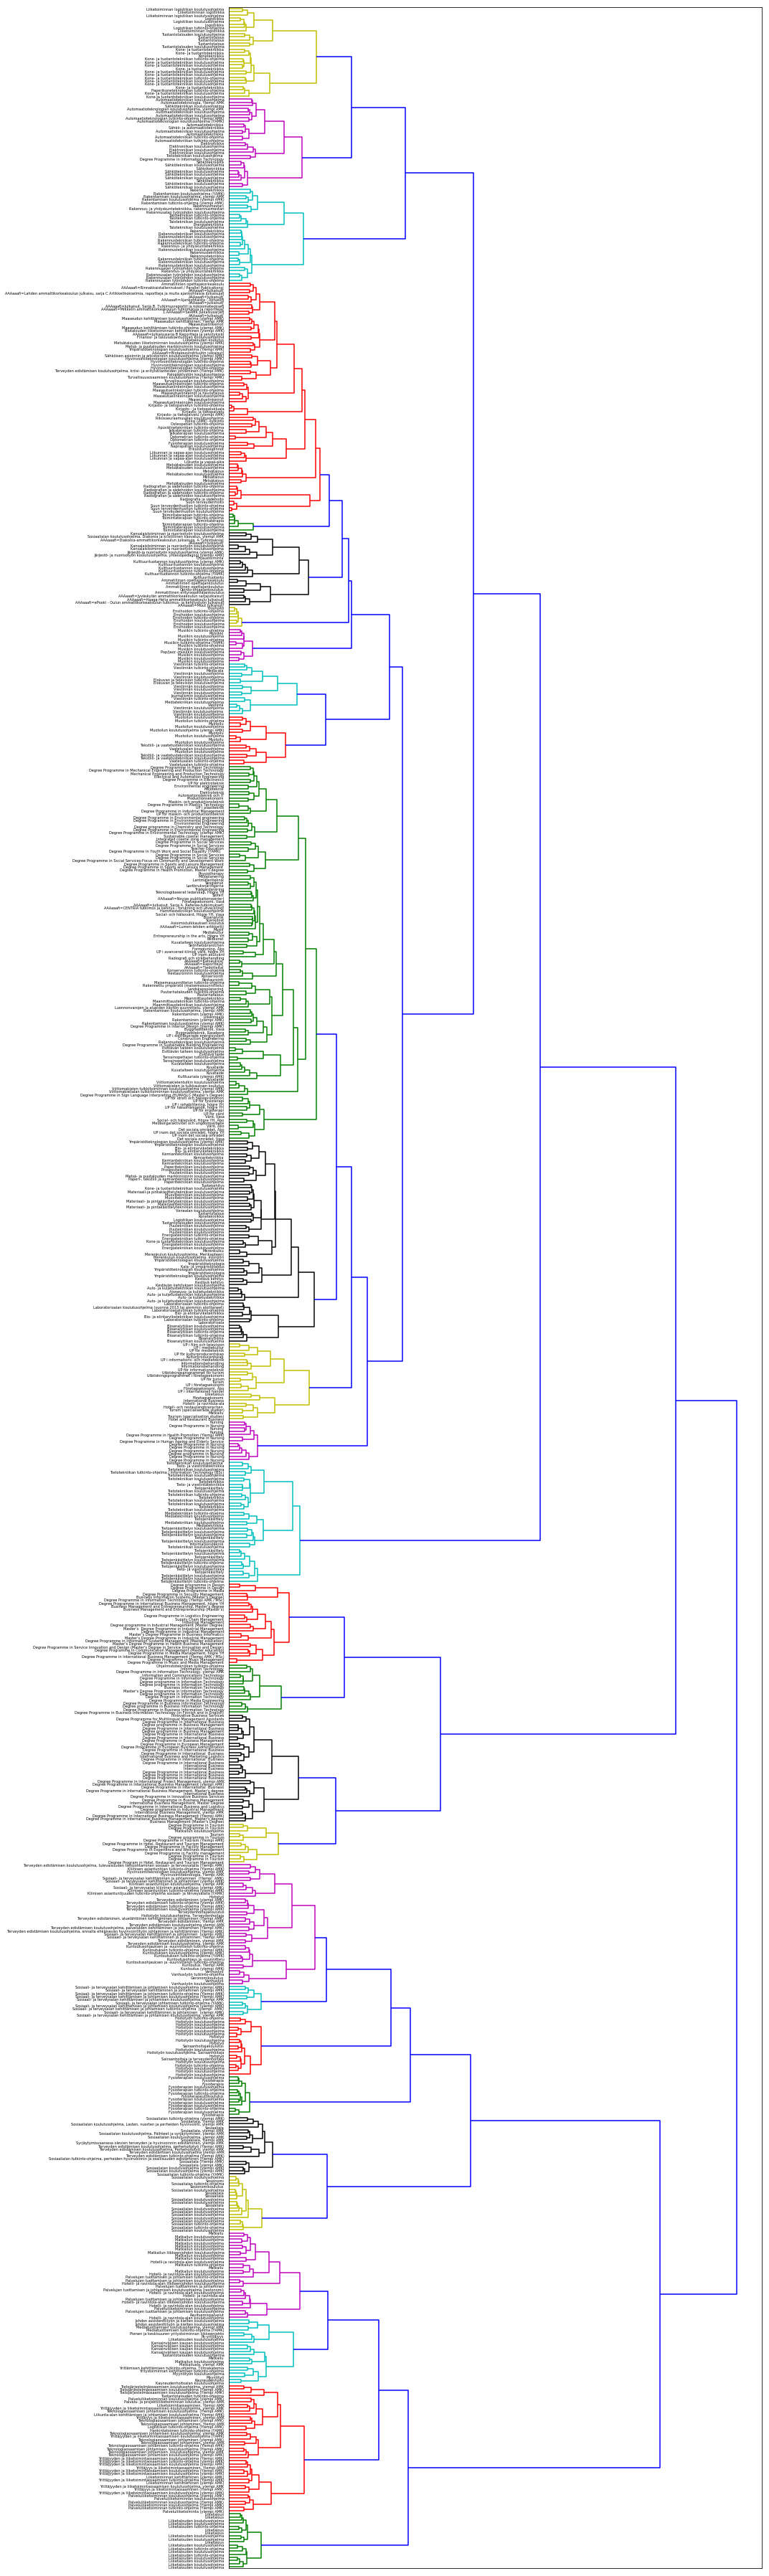

In [12]:
from scipy.cluster.hierarchy import ward, complete, single, weighted, centroid, median, dendrogram
#https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy
# http://brandonrose.org/clustering

linkage_matrix = ward(d) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 50)) # set size
ax = dendrogram(linkage_matrix, color_threshold=6, orientation="right", labels=topics['degree'].values, show_leaf_counts=True);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout
plt.savefig('temp.pdf', format='pdf') 

In [36]:
#m = MultiLabelBinarizer(sparse_output=True).fit_transform(df["topics"])

## TSNE

In [13]:
from sklearn.manifold import TSNE

In [14]:
tsne = TSNE()
# NOTE: tsne does not produce the same results between runs

In [15]:
# Make < 0 equal to 0
#cap_to_zero = np.vectorize(lambda x: 0 if x < 0 else x)
tsne.fit_transform(m.toarray())

array([[  0.68946767,  16.62526528],
       [ -9.66081269, -18.84474019],
       [ 13.7885165 ,  15.16988175],
       ..., 
       [ 25.21688409,  -7.38895261],
       [ -5.90470077,   4.54569307],
       [ 15.38664226, -17.55801015]])

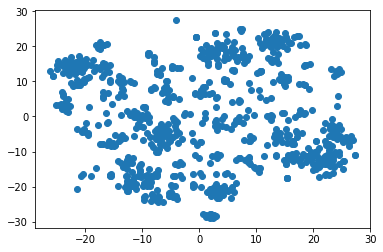

In [16]:
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1])

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
mms = MinMaxScaler()
embeddings = mms.fit_transform(tsne.embedding_)

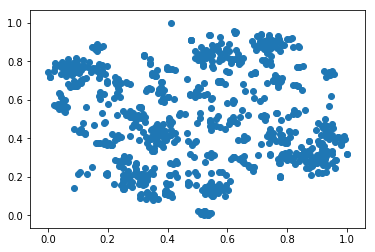

In [19]:
plt.scatter(embeddings[:, 0], embeddings[:, 1])

In [20]:
output = pd.DataFrame()
output['x'] = embeddings[:, 0]
output['y'] = embeddings[:, 1]
output['degree'] = topics['degree'].values
output['size'] = topics['n_theses'].values
output['university'] = topics['university'].values

In [271]:
output.to_json("degrees_universities_tsne.json", orient="records")

In [58]:
embeddings.shape

(518, 2)

## Kmeans

In [13]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

In [14]:
def cluster(n_clusters):
    kmeans = MiniBatchKMeans(n_clusters=n_clusters)
    kmeans.fit(m)
    score = silhouette_score(m, kmeans.labels_)
    return kmeans, score

In [122]:
scores = []
for n_clusters in range(2, 30):
    trials = []
    for trial in range(5):
        kmeans, score = cluster(n_clusters)
        trials.append(score)
    scores.append(trials)

In [124]:
scores = np.array(scores)

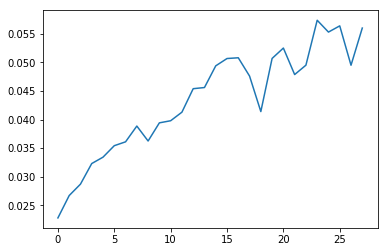

In [125]:
plt.plot(scores.max(axis=1))

In [66]:
kmeans, score = cluster(20)

In [67]:
kmeans.labels_

array([13, 18,  6, 16,  6, 18, 18, 16, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 19, 18, 18, 18, 18,  6, 18, 18, 18, 18, 18,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  9, 16, 16, 18, 18, 18, 18,  4,  7,
       13, 13, 13,  6,  6,  5, 13,  7, 13,  7,  7, 13, 13,  5, 18,  5,  5,
        5, 13, 13, 13, 13, 13, 18, 18, 13, 19,  5,  4,  7,  4,  7, 13, 18,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13,  5,  7,  7, 13, 13, 13, 18,
        5,  5,  4, 13, 18, 18, 18, 18, 18,  5, 13, 13, 17,  7, 13,  5,  5,
       13,  5,  7, 18, 13, 19, 19,  6,  6,  6, 15, 15,  6, 16,  1, 12, 12,
       12,  9,  5,  5, 18, 18, 18, 18, 19,  0,  0,  0,  0, 14, 18, 14,  0,
       18,  3, 12, 12, 12,  0, 12, 14, 14,  2,  2,  2,  2, 18, 18, 18, 18,
        6,  5,  7,  7,  7,  7, 13,  5, 13, 13, 13, 13, 18, 18, 15, 15,  8,
        8, 16, 15,  8, 15, 15, 16, 16, 16, 16, 18, 18, 18, 18, 12, 18, 12,
       11,  6,  6,  6,  6,  6,  9,  9,  9, 15, 15, 15, 15, 15, 19,  0,  0,
        8,  0,  0,  0,  0

In [69]:
topics['cluster'] = kmeans.labels_

In [70]:
topics['cluster'].value_counts()

18    108
6      51
13     42
15     37
3      35
0      31
7      29
8      28
19     23
16     22
5      22
2      17
12     15
1      15
14     14
9      10
10      7
4       6
11      4
17      2
Name: cluster, dtype: int64

In [88]:
topics[topics['cluster'] == 3]

,degree,topics,n_topics,labels,cluster
224,Hankintatoimen tutkinto-ohjelma (YAMK),portfolioanalyysi liikenteen turvallisuusviras...,5923,5,3
326,Liiketoiminnan kehittäminen (ylempi AMK),lisäarvo toimitusketjun hallinta prosessi teol...,16323,0,3
331,"Liiketoimintaosaaminen, Ylempi AMK",tarvekartoitus sijoitustoiminta asiakastyytyvä...,2661,0,3
334,Liikunta-alan kehittämisen ja johtamisen koulu...,työyhteisöliikunta liikuntamotivaatio työhyvin...,3610,1,3
337,Logistiikan tutkinto-ohjelma (Ylempi AMK),prosessit tietojärjestelmät johtaminen hankint...,5711,5,3
429,Palveluliiketoiminnan tutkinto-ohjelma (Ylempi...,palvelutuotanto henkilöstö ikääntyneet osaamin...,10312,0,3
430,Palveluliiketoiminta (ylempi AMK),tulevaisuudentutkimus johtaminen verkostoitumi...,5956,0,3
482,Sosiaali- ja terveysalan johtamisen tutkinto-o...,vertaistuki elintavat empowerment voimaantumin...,18650,1,3
483,Sosiaali- ja terveysalan kehittäminen ja johta...,kirjaaminen kehittäminen rekisteröinti hoitoty...,3475,1,3
485,Sosiaali- ja terveysalan kehittäminen ja johta...,opiskeluterveydenhuolto audit päihdekasvatus e...,19503,1,3


## DBSCAN

In [47]:
from sklearn.cluster import DBSCAN
from matplotlib import cm
from matplotlib.colors import Normalize

In [245]:
dbscan = DBSCAN(eps=0.04, min_samples=2)
dbscan.fit(output[["x", "y"]])

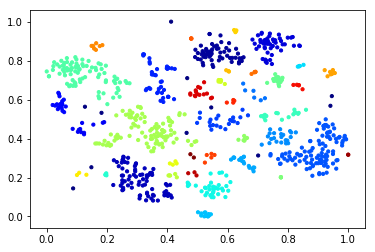

In [248]:
cmap = plt.get_cmap('jet')
norm = Normalize(min(dbscan.labels_), max(dbscan.labels_))
plt.scatter(output["x"], output["y"], 10, cmap(norm(dbscan.labels_)))

In [249]:
output['cluster'] = dbscan.labels_

In [269]:
cluster_sizes = output.groupby(["cluster"])["size"].sum().sort_values(ascending=False)
cluster_sizes

cluster
 7     23261
 0     15180
 20    14063
 2     11140
 1      9243
 16     6725
 13     6018
 5      3542
 9      3338
 15     2304
 10     2302
 17     2071
 6      2050
 34     1642
 11     1456
-1       979
 4       900
 14      844
 19      798
 3       684
 33      676
 29      632
 32      558
 12      510
 27      445
 22      444
 18      431
 23      398
 31      375
 28      327
 36      326
 21      326
 30      320
 8       251
 25      232
 35      219
 37      197
 26      187
 24       79
Name: size, dtype: int64

In [270]:
from IPython.display import display

for cluster in cluster_sizes.index:
    display(output[output["cluster"] == cluster].sort_values("size", ascending=False).head())

,x,y,degree,size,university,cluster
529,0.915002,0.345472,Liiketalouden koulutusohjelma,2400,Laurea-ammattikorkeakoulu,7
267,0.908268,0.291542,Liiketalouden koulutusohjelma,1318,Tampereen ammattikorkeakoulu,7
646,0.876018,0.274470,Liiketalouden koulutusohjelma,1129,Haaga-Helia ammattikorkeakoulu,7
550,0.880126,0.291923,Liiketalouden koulutusohjelma,1066,Lahden ammattikorkeakoulu,7
153,0.910290,0.290814,Liiketalous,1027,Satakunnan ammattikorkeakoulu,7


,x,y,degree,size,university,cluster
519,0.537334,0.838992,Hoitotyön koulutusohjelma,1516,Laurea-ammattikorkeakoulu,0
104,0.538261,0.846671,Hoitotyö,1085,Satakunnan ammattikorkeakoulu,0
109,0.548601,0.857462,Hoitotyön koulutusohjelma,1084,Diakonia-ammattikorkeakoulu,0
258,0.519686,0.819927,Hoitotyön koulutusohjelma,978,Tampereen ammattikorkeakoulu,0
388,0.539866,0.820329,Hoitotyön koulutusohjelma,974,Metropolia Ammattikorkeakoulu,0


,x,y,degree,size,university,cluster
508,0.361914,0.406521,Tietotekniikan koulutusohjelma,757,Metropolia Ammattikorkeakoulu,20
303,0.213416,0.367455,Viestinnän koulutusohjelma,665,Tampereen ammattikorkeakoulu,20
513,0.401087,0.410804,Tietojenkäsittelyn koulutusohjelma,576,Laurea-ammattikorkeakoulu,20
350,0.237200,0.409186,Viestinnän tutkinto-ohjelma,501,Metropolia Ammattikorkeakoulu,20
300,0.384915,0.441874,Tietojenkäsittelyn koulutusohjelma,499,Tampereen ammattikorkeakoulu,20


,x,y,degree,size,university,cluster
110,0.772944,0.914181,Sosiaalialan koulutusohjelma,1830,Diakonia-ammattikorkeakoulu,2
355,0.789580,0.883644,Kansalaistoiminnan ja nuorisotyön koulutusohjelma,935,Humanistinen ammattikorkeakoulu,2
526,0.732081,0.891282,Sosiaalialan koulutusohjelma,800,Laurea-ammattikorkeakoulu,2
95,0.730708,0.900663,Sosiaalialan koulutusohjelma,439,Kymenlaakson ammattikorkeakoulu,2
437,0.753259,0.898868,Sosiaalialan tutkinto-ohjelma,437,Metropolia Ammattikorkeakoulu,2


,x,y,degree,size,university,cluster
729,0.318477,0.158924,Kone- ja tuotantotekniikan koulutusohjelma,762,Tampereen ammattikorkeakoulu,1
735,0.396297,0.130026,Sähkötekniikan koulutusohjelma,548,Tampereen ammattikorkeakoulu,1
506,0.411299,0.108331,Sähkötekniikan koulutusohjelma,435,Metropolia Ammattikorkeakoulu,1
426,0.331951,0.210989,Kone- ja tuotantotekniikan tutkinto-ohjelma,359,Oulun ammattikorkeakoulu,1
497,0.317025,0.215440,Kone- ja tuotantotekniikan koulutusohjelma,286,Metropolia Ammattikorkeakoulu,1


,x,y,degree,size,university,cluster
659,0.053366,0.774513,Degree Programme in International Business,348,Haaga-Helia ammattikorkeakoulu,16
530,0.000000,0.744484,Degree Programme in Business Management,342,Laurea-ammattikorkeakoulu,16
727,0.108945,0.756365,Degree Programme in International Business,301,Tampereen ammattikorkeakoulu,16
125,0.172647,0.638514,Rakennustekniikan koulutusohjelma,288,Saimaan ammattikorkeakoulu,16
791,0.078944,0.779147,International Business,240,Turun ammattikorkeakoulu,16


,x,y,degree,size,university,cluster
733,0.547172,0.099302,Rakennustekniikan koulutusohjelma,760,Tampereen ammattikorkeakoulu,13
504,0.552948,0.129002,Rakennustekniikan tutkinto-ohjelma,444,Metropolia Ammattikorkeakoulu,13
428,0.559629,0.148897,Rakennustekniikan tutkinto-ohjelma,437,Oulun ammattikorkeakoulu,13
507,0.472381,0.163121,Talotekniikan tutkinto-ohjelma,426,Metropolia Ammattikorkeakoulu,13
205,0.558065,0.145830,Rakennustekniikan koulutusohjelma,368,Savonia-ammattikorkeakoulu,13


,x,y,degree,size,university,cluster
575,0.382101,0.634408,Ympäristöteknologian koulutusohjelma,386,Lahden ammattikorkeakoulu,5
740,0.358653,0.726439,Bio- ja elintarviketekniikka,200,Turun ammattikorkeakoulu,5
354,0.398238,0.760818,Bioanalytiikan tutkinto-ohjelma,171,Metropolia Ammattikorkeakoulu,5
237,0.320374,0.826188,Rakennettu ympäristö (maisemasuunnittelu),165,Hämeen ammattikorkeakoulu,5
221,0.369933,0.639451,Ympäristöteknologian koulutusohjelma,154,Savonia-ammattikorkeakoulu,5


,x,y,degree,size,university,cluster
582,0.754127,0.427622,Ammatillinen opettajankoulutus,899,Jyväskylän ammattikorkeakoulu,9
722,0.738827,0.376476,Ammatillinen opettajakorkeakoulu,825,Tampereen ammattikorkeakoulu,9
43,0.800713,0.376009,AAAaaafi=ePooki - Oulun ammattikorkeakoulun tu...,244,Oulun ammattikorkeakoulu,9
179,0.778300,0.408043,AAAaaafi=Julkaisut|,133,Kymenlaakson ammattikorkeakoulu,9
779,0.713109,0.368853,AAAaaafi=Julkaisut. Sarja B. Tutkimusraportit ...,132,Lapin ammattikorkeakoulu,9


,x,y,degree,size,university,cluster
235,0.859977,0.547746,Maaseutuelinkeinot ja hevostalous,302,Hämeen ammattikorkeakoulu,15
53,0.823559,0.533882,Maaseutuelinkeinot,260,Seinäjoen ammattikorkeakoulu,15
731,0.721678,0.506214,Metsätalouden koulutusohjelma,236,Tampereen ammattikorkeakoulu,15
196,0.780044,0.496663,Maaseutuelinkeinojen koulutusohjelma,224,Savonia-ammattikorkeakoulu,15
602,0.824411,0.533708,Maaseutuelinkeinojen tutkinto-ohjelma,190,Jyväskylän ammattikorkeakoulu,15


,x,y,degree,size,university,cluster
558,0.638509,0.290731,Muotoilun koulutusohjelma,406,Lahden ammattikorkeakoulu,10
198,0.647662,0.284561,Muotoilun koulutusohjelma,396,Savonia-ammattikorkeakoulu,10
334,0.644652,0.299325,Muotoilun tutkinto-ohjelma,219,Metropolia Ammattikorkeakoulu,10
89,0.621795,0.301608,Muotoilun koulutusohjelma,193,Kymenlaakson ammattikorkeakoulu,10
56,0.620679,0.302707,Muotoilu,157,Seinäjoen ammattikorkeakoulu,10


,x,y,degree,size,university,cluster
585,0.764740,0.693119,Fysioterapian tutkinto-ohjelma,229,Jyväskylän ammattikorkeakoulu,17
368,0.753462,0.695536,Fysioterapian tutkinto-ohjelma,207,Metropolia Ammattikorkeakoulu,17
257,0.759850,0.711569,Fysioterapian koulutusohjelma,194,Tampereen ammattikorkeakoulu,17
545,0.763134,0.696392,Fysioterapian koulutusohjelma,186,Lahden ammattikorkeakoulu,17
94,0.779863,0.700316,Fysioterapia,152,Satakunnan ammattikorkeakoulu,17


,x,y,degree,size,university,cluster
169,0.542157,0.465476,Liiketalous,372,Vaasan ammattikorkeakoulu,6
627,0.507483,0.505795,UP i företagsekonomi,347,Yrkeshögskolan Arcada,6
167,0.592594,0.448193,International Business,217,Vaasan ammattikorkeakoulu,6
159,0.576166,0.458561,Företagsekonomi,201,Vaasan ammattikorkeakoulu,6
445,0.563607,0.466359,"Företagsekonomi, Åbo",162,Yrkeshögskolan Novia,6


,x,y,degree,size,university,cluster
637,0.502241,0.664875,UP för vård,282,Yrkeshögskolan Arcada,34
465,0.508669,0.660224,"Vård, Vasa",232,Yrkeshögskolan Novia,34
642,0.494140,0.647179,UP inom det sociala området,206,Yrkeshögskolan Arcada,34
626,0.544559,0.606924,UP för fysioterapi,156,Yrkeshögskolan Arcada,34
462,0.499079,0.628779,"Det sociala området, Åbo",140,Yrkeshögskolan Novia,34


,x,y,degree,size,university,cluster
344,0.533587,0.002257,Musiikin tutkinto-ohjelma,295,Metropolia Ammattikorkeakoulu,11
561,0.538369,0.004876,Musiikin koulutusohjelma,205,Lahden ammattikorkeakoulu,11
348,0.512665,0.015682,Pop/jazz -musiikin koulutusohjelma,181,Metropolia Ammattikorkeakoulu,11
269,0.522727,0.000671,Musiikin koulutusohjelma,137,Tampereen ammattikorkeakoulu,11
398,0.527527,0.004238,Musiikin tutkinto-ohjelma,126,Oulun ammattikorkeakoulu,11


,x,y,degree,size,university,cluster
531,0.701199,0.313022,Turvallisuusalan koulutusohjelma,317,Laurea-ammattikorkeakoulu,-1
414,0.940901,0.568206,Optometrian tutkinto-ohjelma,136,Metropolia Ammattikorkeakoulu,-1
732,0.087594,0.144240,Paperitekniikan koulutusohjelma,121,Tampereen ammattikorkeakoulu,-1
787,0.148141,0.252669,"Paperi-, tekstiili ja kemiantekniikan koulutus...",116,Tampereen ammattikorkeakoulu,-1
595,0.463897,0.429194,Hyvinvointiteknologian tutkinto-ohjelma,83,Jyväskylän ammattikorkeakoulu,-1


,x,y,degree,size,university,cluster
593,0.047944,0.566908,Degree Programme in Nursing,116,Jyväskylän ammattikorkeakoulu,4
661,0.038522,0.634806,Degree Programme in Sports and Leisure Management,99,Haaga-Helia ammattikorkeakoulu,4
69,0.042454,0.616990,Physiotherapy,88,Satakunnan ammattikorkeakoulu,4
521,0.044666,0.576571,Degree Programme in Nursing,79,Laurea-ammattikorkeakoulu,4
794,0.050457,0.582512,Nursing,68,Turun ammattikorkeakoulu,4


,x,y,degree,size,university,cluster
485,0.197480,0.221644,Auto- ja kuljetustekniikan koulutusohjelma,349,Metropolia Ammattikorkeakoulu,14
724,0.196022,0.214915,Auto- ja kuljetustekniikan koulutusohjelma,211,Tampereen ammattikorkeakoulu,14
723,0.195604,0.216147,Ajoneuvo- ja kuljetustekniikka,130,Turun ammattikorkeakoulu,14
371,0.194366,0.213966,Auto- ja kuljetustekniikan koulutusohjelma,93,Mikkelin ammattikorkeakoulu,14
35,0.198132,0.211148,Auto- ja kuljetustekniikka,61,Seinäjoen ammattikorkeakoulu,14


,x,y,degree,size,university,cluster
356,0.654842,0.413541,Kulttuurituotannon koulutusohjelma,413,Humanistinen ammattikorkeakoulu,19
51,0.635889,0.393823,Kulttuurituotanto,125,Seinäjoen ammattikorkeakoulu,19
308,0.655677,0.389326,Kulttuurituotannon tutkinto-ohjelma,102,Metropolia Ammattikorkeakoulu,19
365,0.652785,0.391203,Kulttuurituotannon koulutusohjelma,72,Mikkelin ammattikorkeakoulu,19
359,0.657583,0.397568,Kulttuurituotannon koulutusohjelma (ylempi AMK),46,Humanistinen ammattikorkeakoulu,19


,x,y,degree,size,university,cluster
730,0.106547,0.444770,Kuvataiteen koulutusohjelma,197,Tampereen ammattikorkeakoulu,3
151,0.114031,0.432814,Kuvataide,133,Satakunnan ammattikorkeakoulu,3
522,0.190589,0.484304,AAAaaafi=Novias publikationsserier|,89,Yrkeshögskolan Novia,3
441,0.117396,0.480340,"Formgivning, Åbo",85,Yrkeshögskolan Novia,3
3,0.086137,0.449891,Kuvataide,66,Turun ammattikorkeakoulu,3


,x,y,degree,size,university,cluster
649,0.836578,0.674185,Liikunnan ja vapaa-ajan koulutusohjelma,360,Haaga-Helia ammattikorkeakoulu,33
313,0.829725,0.676254,Liikunnan ja vapaa-ajan koulutusohjelma,104,Kajaanin ammattikorkeakoulu,33
756,0.818149,0.675373,Liikunta ja vapaa-aika,96,Lapin ammattikorkeakoulu,33
552,0.835883,0.673161,Liikunnan ja vapaa-ajan koulutusohjelma,63,Lahden ammattikorkeakoulu,33
668,0.848496,0.653040,Liikunta-alan kehittämisen ja johtamisen koulu...,53,Haaga-Helia ammattikorkeakoulu,33


,x,y,degree,size,university,cluster
471,0.689172,0.740350,Toimintaterapian tutkinto-ohjelma,202,Metropolia Ammattikorkeakoulu,29
618,0.690163,0.740960,Toimintaterapian tutkinto-ohjelma,196,Jyväskylän ammattikorkeakoulu,29
691,0.691437,0.741823,Toimintaterapia,88,Turun ammattikorkeakoulu,29
422,0.691323,0.741838,Toimintaterapian tutkinto-ohjelma,74,Oulun ammattikorkeakoulu,29
218,0.692760,0.742763,Toimintaterapian koulutusohjelma,41,Savonia-ammattikorkeakoulu,29


,x,y,degree,size,university,cluster
304,0.618596,0.584461,Esittävän taiteen koulutusohjelma,208,Metropolia Ammattikorkeakoulu,32
812,0.622158,0.593923,Esittävä taide,196,Turun ammattikorkeakoulu,32
274,0.618866,0.597917,Esittävän taiteen koulutusohjelma,109,Centria-ammattikorkeakoulu,32
444,0.597312,0.584730,Scenkonst,45,Yrkeshögskolan Novia,32


,x,y,degree,size,university,cluster
435,0.837658,0.771244,Radiografian ja sädehoidon tutkinto-ohjelma,130,Metropolia Ammattikorkeakoulu,12
271,0.837783,0.771713,Radiografian ja sädehoidon koulutusohjelma,110,Tampereen ammattikorkeakoulu,12
420,0.838597,0.772605,Radiografian ja sädehoidon tutkinto-ohjelma,90,Oulun ammattikorkeakoulu,12
204,0.838797,0.772375,Radiografian ja sädehoidon koulutusohjelma,84,Savonia-ammattikorkeakoulu,12
25,0.832787,0.769137,Radiografia ja sädehoito,82,Turun ammattikorkeakoulu,12


,x,y,degree,size,university,cluster
357,0.946275,0.731969,Viittomakielentulkin koulutusohjelma,205,Humanistinen ammattikorkeakoulu,27
701,0.921890,0.751129,AAAaaafi=Julkaisut|,95,Humanistinen ammattikorkeakoulu,27
111,0.949114,0.751733,Viittomakielen ja tulkkauksen koulutus,84,Diakonia-ammattikorkeakoulu,27
699,0.931366,0.719508,Asioimistulkkauksen koulutus,27,Diakonia-ammattikorkeakoulu,27
360,0.939832,0.742299,Viittomakielen tulkkitoiminnan koulutusohjelma...,16,Humanistinen ammattikorkeakoulu,27


,x,y,degree,size,university,cluster
362,0.569840,0.692561,Ensihoidon tutkinto-ohjelma,85,Metropolia Ammattikorkeakoulu,22
76,0.576643,0.697652,Ensihoidon koulutusohjelma,67,Kymenlaakson ammattikorkeakoulu,22
810,0.576977,0.691908,Ensihoito,66,Turun ammattikorkeakoulu,22
132,0.570225,0.700429,Ensihoidon koulutusohjelma,62,Saimaan ammattikorkeakoulu,22
415,0.576254,0.692361,Ensihoidon tutkinto-ohjelma,47,Oulun ammattikorkeakoulu,22


,x,y,degree,size,university,cluster
47,0.776827,0.201168,Kirjasto - ja tietopalveluala,144,Seinäjoen ammattikorkeakoulu,18
820,0.776842,0.201107,Kirjasto- ja tietopalvelu,132,Turun ammattikorkeakoulu,18
404,0.776685,0.201008,Kirjasto- ja tietopalvelun tutkinto-ohjelma,127,Oulun ammattikorkeakoulu,18
718,0.776689,0.202182,Kirjasto- ja tietopalvelu (ylempi AMK),28,Turun ammattikorkeakoulu,18


,x,y,degree,size,university,cluster
447,0.427023,0.283058,Sjöfart,117,Yrkeshögskolan Novia,23
158,0.408468,0.272187,Merenkulku,98,Satakunnan ammattikorkeakoulu,23
86,0.430816,0.272121,Merenkulun koulutusohjelma. Merikapteeni,93,Kymenlaakson ammattikorkeakoulu,23
84,0.418202,0.266056,Merenkulun koulutusohjelma. Insinööri,90,Kymenlaakson ammattikorkeakoulu,23


,x,y,degree,size,university,cluster
499,0.546280,0.321722,Maanmittaustekniikan tutkinto-ohjelma,192,Metropolia Ammattikorkeakoulu,31
232,0.524615,0.276733,Liikenneala,106,Hämeen ammattikorkeakoulu,31
453,0.530806,0.315616,Lantmäteriteknik,27,Yrkeshögskolan Novia,31
373,0.546046,0.302767,Maanmittaustekniikan koulutusohjelma,26,Mikkelin ammattikorkeakoulu,31
743,0.556543,0.315827,"Luonnonvarojen ja alueiden käytön suunnittelu,...",24,Lapin ammattikorkeakoulu,31


,x,y,degree,size,university,cluster
113,0.148699,0.875672,Degree Programme in Social Services-Focus on C...,123,Diakonia-ammattikorkeakoulu,28
524,0.154173,0.875810,Degree Programme in Social Services,72,Laurea-ammattikorkeakoulu,28
436,0.175876,0.874663,Degree Programme in Social Services,67,Metropolia Ammattikorkeakoulu,28
711,0.163138,0.855339,Teacher Education,32,Jyväskylän ammattikorkeakoulu,28
765,0.164059,0.889436,Degree Programme in Social Services,14,Lapin ammattikorkeakoulu,28


,x,y,degree,size,university,cluster
520,1.000000,0.317182,Kauneudenhoitoalan koulutusohjelma,218,Laurea-ammattikorkeakoulu,36
816,0.999813,0.317168,Kauneudenhoito,108,Turun ammattikorkeakoulu,36


,x,y,degree,size,university,cluster
75,0.409189,0.210195,Energiatekniikan koulutusohjelma,136,Kymenlaakson ammattikorkeakoulu,21
525,0.407166,0.210973,Energiatekniikan koulutusohjelma,68,Savonia-ammattikorkeakoulu,21
81,0.403929,0.210538,Kone-ja tuotantotekniikan koulutusohjelma,52,Kymenlaakson ammattikorkeakoulu,21
792,0.431476,0.201103,Energiatekniikan tutkinto-ohjelma,38,Jyväskylän ammattikorkeakoulu,21
804,0.426080,0.218201,Energiatekniikan tutkinto-ohjelma,32,Oulun ammattikorkeakoulu,21


,x,y,degree,size,university,cluster
212,0.479505,0.913485,Suun terveydenhuollon koulutushjelma,97,Savonia-ammattikorkeakoulu,30
456,0.479676,0.913184,Suun terveydenhuollon tutkinto-ohjelma,84,Metropolia Ammattikorkeakoulu,30
686,0.479098,0.913466,Suun terveydenhoito,81,Turun ammattikorkeakoulu,30
421,0.478923,0.913549,Suun terveydenhuollon tutkinto-ohjelma,58,Oulun ammattikorkeakoulu,30


,x,y,degree,size,university,cluster
399,0.723673,0.607025,Tanssinopettajan tutkinto-ohjelma,81,Oulun ammattikorkeakoulu,8
214,0.709951,0.596478,Tanssinopettajan koulutusohjelma,54,Savonia-ammattikorkeakoulu,8
805,0.651567,0.682236,AAAaaafi=Raportteja|,52,Poliisiammattikorkeakoulu,8
8,0.658144,0.647231,Poliisi (AMK) -tutkinto,31,Poliisiammattikorkeakoulu,8
807,0.685717,0.645233,AAAaaafi=Tiedotteita|,22,Poliisiammattikorkeakoulu,8


,x,y,degree,size,university,cluster
102,0.626661,0.949353,Vanhustyön koulutusohjelma,80,Kymenlaakson ammattikorkeakoulu,25
704,0.625765,0.946110,Vanhustyö,63,Satakunnan ammattikorkeakoulu,25
472,0.629019,0.954969,Vanhustyön tutkinto-ohjelma,62,Metropolia Ammattikorkeakoulu,25
749,0.621443,0.957092,Geronomikoulutus,27,Lapin ammattikorkeakoulu,25


,x,y,degree,size,university,cluster
510,0.469282,0.222098,"Byggnadsteknik, Vasa",109,Yrkeshögskolan Novia,35
678,0.490162,0.226909,UP i distribuerade energisystem,56,Yrkeshögskolan Arcada,35
450,0.496772,0.210693,"Byggnadsteknik, Raseborg",54,Yrkeshögskolan Novia,35


,x,y,degree,size,university,cluster
757,0.487963,0.302794,Maanmittaustekniikka,160,Lapin ammattikorkeakoulu,37
687,0.476511,0.319678,Teknologiaosaamisen johtaminen (ylempi AMK),37,Turun ammattikorkeakoulu,37


,x,y,degree,size,university,cluster
492,0.604371,0.743695,Hyvinvointiteknologian koulutusohjelma,77,Metropolia Ammattikorkeakoulu,26
107,0.602768,0.746739,"Hyvinvointiteknologia, Ylempi AMK",61,Satakunnan ammattikorkeakoulu,26
785,0.595398,0.750689,"Hyvinvointiteknologian koulutusohjelma, ylempi...",49,Tampereen ammattikorkeakoulu,26


,x,y,degree,size,university,cluster
87,0.107717,0.224424,Metsä- ja puutalouden markkinoinnin koulutusoh...,32,Kymenlaakson ammattikorkeakoulu,24
480,0.100266,0.212867,Paperitekniikan koulutusohjelma,27,Saimaan ammattikorkeakoulu,24
123,0.131608,0.214304,Prosessitekniikan koulutusohjelma,20,Saimaan ammattikorkeakoulu,24
